In [1]:
# format cells using black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [1]:
import os
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import sleep

## meta data example

In [3]:
path = os.path.abspath("")
data_revisions_meta_rel = "data/revisions_meta/"
data_revisions_meta_abs = os.path.join(data_revisions_meta_rel, "189562951.pkl")


with open(data_revisions_meta_abs, "rb") as handle:
    d = pickle.load(handle)
    print({k: v for (k, v) in d.items() if k not in ["months", "contributors"]})

{'creator_user_id': 68647, 'created_month': '2006-02', 'last_change_month': '2022-01'}


<IPython.core.display.Javascript object>

## eval (monthly) revisions

In [4]:
cwd = os.getcwd()
revisions_rel_path = "data/revisions/"
revisions_abs_path = os.path.join(cwd, revisions_rel_path)
directory = os.fsencode(revisions_abs_path)
pattern_month = re.compile(r"^\d{4}-(\d{2})-\d{2}T.*$")
pattern_year = re.compile(r"^(\d{4})-\d{2}-\d{2}T.*$")
min_month = None
min_year = None
max_month = None
max_year = None
r = {}
k = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".pkl"):
        k += 1
        biography_revision_abs = os.path.join(cwd, revisions_rel_path, filename)
        df = pd.read_pickle(biography_revision_abs)
        rows = len(df.index)
        timestamp_min = df.iloc[0]["timestamp"]
        timestamp_min_year = int(pattern_year.findall(timestamp_min)[0])
        timestamp_min_month = int(pattern_month.findall(timestamp_min)[0])
        timestamp_max = df.iloc[-1]["timestamp"]
        timestamp_max_year = int(pattern_year.findall(timestamp_max)[0])
        timestamp_max_month = int(pattern_month.findall(timestamp_max)[0])
        if min_month == None:
            min_year = timestamp_min_year
            min_month = timestamp_min_month
            max_year = timestamp_max_year
            max_month = timestamp_max_month
        else:
            if timestamp_min_year < min_year:
                min_year = timestamp_min_year
                min_month = timestamp_min_month
            elif timestamp_min_year == min_year:
                if timestamp_min_month < min_month:
                    min_month = timestamp_min_month
            if timestamp_max_year > max_year:
                max_year = timestamp_max_year
                max_month = timestamp_max_month
            elif timestamp_max_year == max_year:
                if timestamp_max_month > max_month:
                    max_month = timestamp_max_month
        if rows in r:
            r[rows] += 1
        else:
            r[rows] = 1
        print(f"processed files: {k}", end="\r")
print("")
print(f"[{min_year}-{min_month}, {max_year}-{max_month}]")

processed files: 20457
[2001-6, 2022-5]


<IPython.core.display.Javascript object>

In [5]:
def get_months() -> dict:
    # min_month = 6
    # min_year = 2001
    # max_month = 5
    # max_year = 2022
    months = {}
    for year in range(min_year, max_year + 1):
        for month in range(1, 13):
            padding_zero = ""
            if year == min_year and month < min_month:
                continue
            if year == max_year and month > max_month:
                continue
            if month < 10:
                padding_zero = "0"
            months[
                f"{year}-{padding_zero}{month}"
            ] = 0  # number of revisions for that article in that month
    return months

<IPython.core.display.Javascript object>

In [6]:
# Wikipedia: Seit März 2001 sind 2.688.206 Artikel in deutscher Sprache entstanden.

<IPython.core.display.Javascript object>

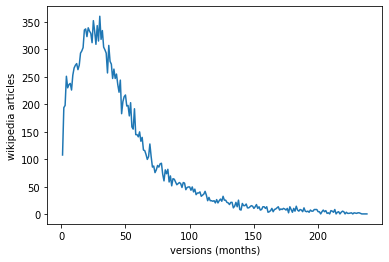

<IPython.core.display.Javascript object>

In [7]:
rows = [(k, r[k]) for k in r]
rows.sort()
number_rows, values = zip(*rows)
plt.plot(number_rows, values)
plt.ylabel("wikipedia articles")
plt.xlabel("versions (months)")
plt.show()

In [9]:
rows

[(1, 108),
 (2, 194),
 (3, 198),
 (4, 251),
 (5, 230),
 (6, 236),
 (7, 238),
 (8, 226),
 (9, 253),
 (10, 266),
 (11, 271),
 (12, 274),
 (13, 263),
 (14, 271),
 (15, 293),
 (16, 297),
 (17, 303),
 (18, 335),
 (19, 337),
 (20, 323),
 (21, 339),
 (22, 333),
 (23, 329),
 (24, 312),
 (25, 352),
 (26, 333),
 (27, 309),
 (28, 343),
 (29, 315),
 (30, 360),
 (31, 318),
 (32, 334),
 (33, 304),
 (34, 299),
 (35, 293),
 (36, 257),
 (37, 307),
 (38, 278),
 (39, 273),
 (40, 247),
 (41, 264),
 (42, 247),
 (43, 255),
 (44, 236),
 (45, 222),
 (46, 244),
 (47, 183),
 (48, 205),
 (49, 214),
 (50, 217),
 (51, 197),
 (52, 198),
 (53, 179),
 (54, 203),
 (55, 159),
 (56, 155),
 (57, 192),
 (58, 145),
 (59, 145),
 (60, 141),
 (61, 150),
 (62, 133),
 (63, 140),
 (64, 117),
 (65, 116),
 (66, 109),
 (67, 100),
 (68, 105),
 (69, 128),
 (70, 105),
 (71, 86),
 (72, 88),
 (73, 76),
 (74, 81),
 (75, 89),
 (76, 86),
 (77, 92),
 (78, 93),
 (79, 73),
 (80, 61),
 (81, 81),
 (82, 74),
 (83, 82),
 (84, 59),
 (85, 70),
 (86

<IPython.core.display.Javascript object>

## eval (total) revisions (meta data)

In [10]:
cwd = os.getcwd()
revisions_meta_rel_path = "data/revisions_meta/"
revisions_meta_abs_path = os.path.join(cwd, revisions_meta_rel_path)
directory = os.fsencode(revisions_meta_abs_path)

revisions_total = {}
k = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".pkl"):
        k += 1
        blog_rev_meta_abs = os.path.join(revisions_meta_abs_path, filename)

        with open(blog_rev_meta_abs, "rb") as handle:
            meta = pickle.load(handle)
            revisions_amount = sum(meta["months"].values())

            if revisions_amount in revisions_total:
                revisions_total[revisions_amount] += 1
            else:
                revisions_total[revisions_amount] = 1
        print(f"processed files: {k}", end="\r")
        sleep(0.002)

<IPython.core.display.Javascript object>

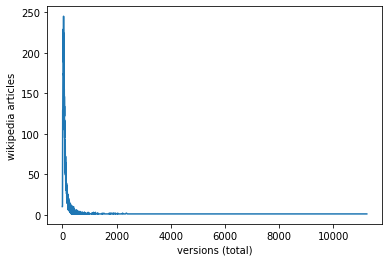

<IPython.core.display.Javascript object>

In [11]:
revs_t = [(k, revisions_total[k]) for k in revisions_total]
revs_t = sorted(revs_t)[:]
number_revisions, number_articles = zip(*revs_t)
plt.plot(number_revisions, number_articles)
plt.ylabel("wikipedia articles")
plt.xlabel("versions (total)")
plt.show()

In [12]:
revs_t

[(1, 10),
 (2, 10),
 (3, 13),
 (4, 32),
 (5, 33),
 (6, 54),
 (7, 59),
 (8, 70),
 (9, 107),
 (10, 110),
 (11, 124),
 (12, 129),
 (13, 117),
 (14, 124),
 (15, 130),
 (16, 146),
 (17, 163),
 (18, 170),
 (19, 163),
 (20, 168),
 (21, 174),
 (22, 173),
 (23, 195),
 (24, 192),
 (25, 179),
 (26, 220),
 (27, 207),
 (28, 211),
 (29, 200),
 (30, 210),
 (31, 200),
 (32, 229),
 (33, 214),
 (34, 193),
 (35, 198),
 (36, 201),
 (37, 212),
 (38, 225),
 (39, 206),
 (40, 210),
 (41, 197),
 (42, 197),
 (43, 209),
 (44, 245),
 (45, 188),
 (46, 200),
 (47, 209),
 (48, 189),
 (49, 207),
 (50, 184),
 (51, 185),
 (52, 177),
 (53, 187),
 (54, 186),
 (55, 183),
 (56, 175),
 (57, 150),
 (58, 146),
 (59, 185),
 (60, 133),
 (61, 147),
 (62, 179),
 (63, 147),
 (64, 153),
 (65, 130),
 (66, 150),
 (67, 105),
 (68, 138),
 (69, 155),
 (70, 146),
 (71, 144),
 (72, 139),
 (73, 121),
 (74, 146),
 (75, 125),
 (76, 122),
 (77, 134),
 (78, 111),
 (79, 115),
 (80, 117),
 (81, 106),
 (82, 100),
 (83, 95),
 (84, 97),
 (85, 107),

<IPython.core.display.Javascript object>

In [13]:
print("articles with >2000 versions: ", len([(x, y) for x, y in revs_t if x > 2000]))
print("articles with >2500 versions: ", len([(x, y) for x, y in revs_t if x > 2500]))
print("articles with >3000 versions: ", len([(x, y) for x, y in revs_t if x > 3000]))
print("articles with >4000 versions: ", len([(x, y) for x, y in revs_t if x > 4000]))

articles with >2000 versions:  55
articles with >2500 versions:  34
articles with >3000 versions:  23
articles with >4000 versions:  6


<IPython.core.display.Javascript object>

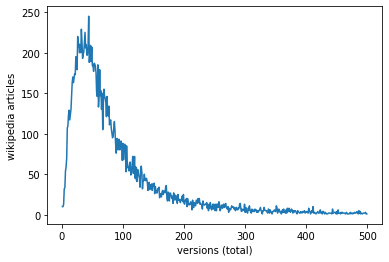

<IPython.core.display.Javascript object>

In [14]:
number_revisions, number_articles = zip(*[(x, y) for x, y in revs_t if x < 500])
plt.plot(number_revisions, number_articles)
plt.ylabel("wikipedia articles")
plt.xlabel("versions (total)")
plt.show()

In [15]:
print("articles with less than 500 versions: ", sum([y for x, y in revs_t if x < 500]))
print(
    "articles with equal or more than 500 versions: ",
    sum([y for x, y in revs_t if x >= 500]),
)
print(f"total amout of versions over all articles:", sum([x * y for (x, y) in revs_t]))

articles with less than 500 versions:  19806
articles with equal or more than 500 versions:  651
total amout of versions over all articles: 2439366


<IPython.core.display.Javascript object>

In [16]:
# TODO better plot-type for visualization

<IPython.core.display.Javascript object>

In [9]:
cwd = os.getcwd()
revisions_meta_rel_path = "data/revisions_meta/"
revisions_meta_abs_path = os.path.join(cwd, revisions_meta_rel_path)
directory = os.fsencode(revisions_meta_abs_path)

creators = {}
articles = {
    "last_change_month": get_months(),
    "revisions_months": get_months(),
    "articles_change_months": get_months(),
}
articles_meta = {}

file_iter = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".pkl"):
        article_revision_meta_abs = os.path.join(cwd, revisions_meta_rel_path, filename)
        with open(article_revision_meta_abs, "rb") as f:
            file_iter += 1
            meta = pickle.load(f)
            articles_meta[filename.replace(".pkl", "")] = meta
            # meta keys: "creator_user_id","created_month","last_change_month","months", "contributors"
            creator_user_id = meta["creator_user_id"]
            created_month = meta["created_month"]
            last_change_month = meta["last_change_month"]
            articles["last_change_month"][last_change_month] += 1
            for k, v in articles["revisions_months"].items():
                articles["revisions_months"][k] += meta["months"][k]
                if meta["months"][k] > 0:
                    articles["articles_change_months"][k] += 1
            if creator_user_id in creators:
                creators[creator_user_id]["articles_created"] += 1
                creators[creator_user_id]["articles_created_months"][created_month] += 1
                for user_name in meta["contributors"][creator_user_id]["user_names"]:
                    if user_name not in creators[creator_user_id]["user_names"]:
                        creators[creator_user_id]["user_names"].append(user_name)
            else:
                acm = {k: 0 for k, v in meta["months"].items()}
                un = meta["contributors"][creator_user_id]["user_names"]
                creators[creator_user_id] = {
                    "articles_created": 1,
                    "articles_created_months": acm,
                    "user_names": un,
                }
                creators[creator_user_id]["articles_created_months"][created_month] += 1
        print(f"processed files: {file_iter}", end="\r")
        sleep(0.002)
assert len(articles_meta) == file_iter

<IPython.core.display.Javascript object>

In [10]:
assert sum(v["articles_created"] for k, v in creators.items()) == 20457
creators_list: [dict] = []
for k, v in creators.items():
    creators_list.append(
        {
            "user_id": k,
            "articles_created": v["articles_created"],
            "articles_created_months": v["articles_created_months"],
            "user_names": v["user_names"],
        }
    )

creators_list_sorted = sorted(
    creators_list, key=lambda d: d["articles_created"], reverse=True
)
print(f"20457 biographies got created by {len(creators_list_sorted)} creators.")
print(
    f'top 1 creator created {sum([c["articles_created"] for c in creators_list_sorted[:1]])} articles. Special type of user... TODO check userid:=1'
)
print(
    f'top 10 creators created {sum([c["articles_created"] for c in creators_list_sorted[:10]])} articles.'
)
print(
    f'top 50 creators created {sum([c["articles_created"] for c in creators_list_sorted[:50]])} articles.'
)
print(
    f'top 100 creators created {sum([c["articles_created"] for c in creators_list_sorted[:100]])} articles.'
)
print("\n")


for c in creators_list_sorted[
    1:10
]:  # exclude (index 0)user_id:0 ? TODO find information about that special user (mult. ip-like user names)
    for k, v in c.items():
        # if k not in ["articles_created_months", "user_names"]:
        if k not in ["articles_created_months"]:
            print(k, ": ", v)
    print("")

20457 biographies got created by 4109 creators.
top 1 creator created 3410 articles. Special type of user... TODO check userid:=1
top 10 creators created 5534 articles.
top 50 creators created 8454 articles.
top 100 creators created 10329 articles.


user_id :  15427
articles_created :  408
user_names :  ['Thiel1929']

user_id :  29738
articles_created :  317
user_names :  ['ChristophDemmer']

user_id :  344569
articles_created :  298
user_names :  ['Claude J']

user_id :  77436
articles_created :  281
user_names :  ['Torsten Schleese']

user_id :  188045
articles_created :  255
user_names :  ['Machahn']

user_id :  391
articles_created :  163
user_names :  ['Media lib']

user_id :  12716
articles_created :  149
user_names :  ['Toolittle']

user_id :  32783
articles_created :  130
user_names :  ['Onkelkoeln']

user_id :  35648
articles_created :  123
user_names :  ['Jonathan Groß']



<IPython.core.display.Javascript object>

In [19]:
creators_articles_created_val = [c["articles_created"] for c in creators_list_sorted]
number_of_months = len(creators_list_sorted[0]["articles_created_months"])

<IPython.core.display.Javascript object>

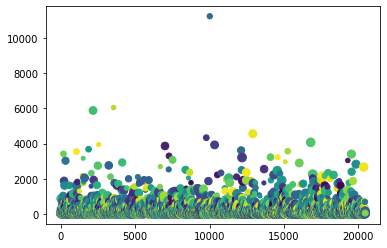

<IPython.core.display.Javascript object>

In [20]:
x = range(len(articles_meta))
y = [sum(v["months"].values()) for k, v in articles_meta.items()]

# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors)

plt.show()

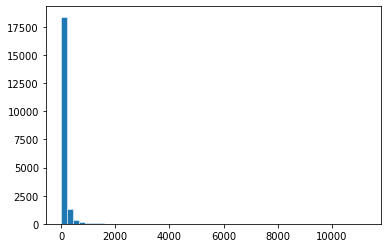

<IPython.core.display.Javascript object>

In [21]:
fig, ax = plt.subplots()
x = [sum(v["months"].values()) for k, v in articles_meta.items()]
ax.hist(x, bins=50, linewidth=0.5, edgecolor="white")


plt.show()

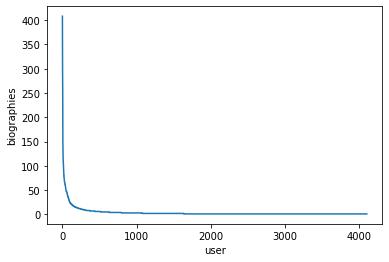

<IPython.core.display.Javascript object>

In [22]:
# special user excluded
x = range(len(creators_articles_created_val) - 1)
y = creators_articles_created_val[1:]
plt.plot(x, y)
plt.ylabel("biographies")
plt.xlabel("user")
plt.show()

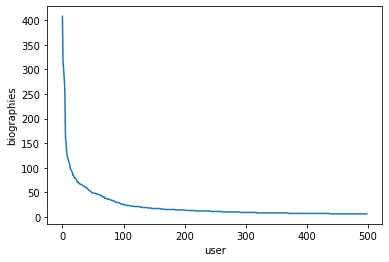

<IPython.core.display.Javascript object>

In [23]:
x = range(499)
y = creators_articles_created_val[1:500]
plt.plot(x, y)
plt.ylabel("biographies")
plt.xlabel("user")
plt.show()

In [24]:
print("i=0:   ", creators_articles_created_val[0], " --special userid:=0")
print("i=1:   ", creators_articles_created_val[1])
print("i=10:  ", creators_articles_created_val[10])
print("i=50:  ", creators_articles_created_val[50])
print("i=100: ", creators_articles_created_val[100])
print("i=200: ", creators_articles_created_val[200])
print("i=300: ", creators_articles_created_val[300])
print("i=400: ", creators_articles_created_val[400])
print("i=500: ", creators_articles_created_val[500])
print("")
print(creators_articles_created_val[:20])

i=0:    3410  --special userid:=0
i=1:    408
i=10:   118
i=50:   49
i=100:  26
i=200:  14
i=300:  9
i=400:  7
i=500:  6

[3410, 408, 317, 298, 281, 255, 163, 149, 130, 123, 118, 114, 111, 106, 98, 96, 94, 91, 85, 85]


<IPython.core.display.Javascript object>

## check when top50 creators created articles

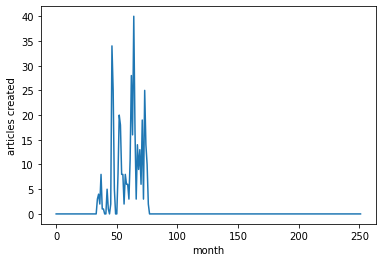

<IPython.core.display.Javascript object>

In [37]:
# change <index> to observe creator
x = range(number_of_months)
y = []
index = 1  # index+1 top creator
creator_to_observe = creators_list_sorted[index]
for k, v in creator_to_observe["articles_created_months"].items():
    y.append(v)
plt.plot(x, y)
plt.ylabel("articles created")
plt.xlabel("month")

plt.show()

In [26]:
# TODO implement method to identify creators, that created multiple articles in a short period of time
# -> indicator for reuse -- maybe sth like >30 articles per month

<IPython.core.display.Javascript object>

In [27]:
# TODO new asserts

<IPython.core.display.Javascript object>

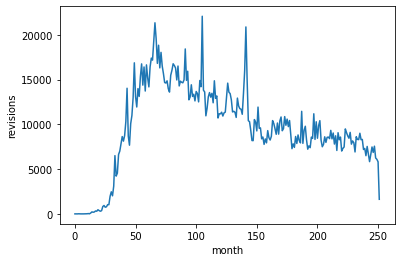

<IPython.core.display.Javascript object>

In [28]:
x = range(len(articles["revisions_months"]))
y = articles["revisions_months"].values()
plt.plot(x, y)
plt.ylabel("revisions")
plt.xlabel("month")
plt.show()

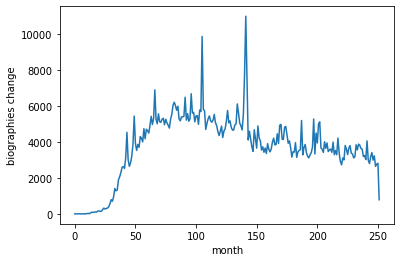

<IPython.core.display.Javascript object>

In [29]:
x = range(len(articles["revisions_months"]))
y = articles["articles_change_months"].values()
plt.plot(x, y)
plt.ylabel("biographies change")
plt.xlabel("month")
plt.show()

In [30]:
articles_created_total_months = {
    k: 0 for k, v in creators_list_sorted[0]["articles_created_months"].items()
}
for creator, v in creators.items():
    for m, r in v["articles_created_months"].items():
        articles_created_total_months[m] += r

<IPython.core.display.Javascript object>

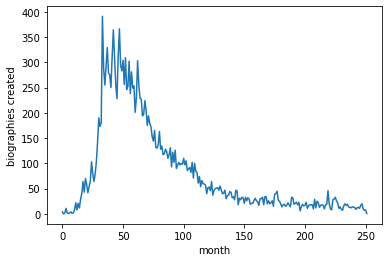

<IPython.core.display.Javascript object>

In [31]:
x = range(len(articles_created_total_months))
y = articles_created_total_months.values()
plt.plot(x, y)
plt.ylabel("biographies created")
plt.xlabel("month")
plt.show()

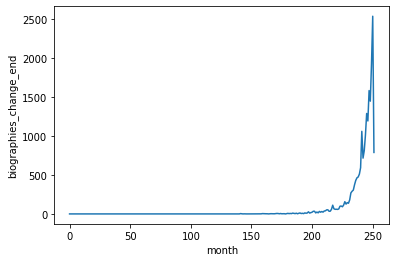

<IPython.core.display.Javascript object>

In [32]:
x = range(len(articles["last_change_month"]))
y = articles["last_change_month"].values()
plt.plot(x, y)
plt.ylabel("biographies_change_end")
plt.xlabel("month")
plt.show()

# test space

In [11]:
cwd = os.getcwd()
path_rel = "data/revisions/"
path_abs = os.path.join(cwd, path_rel, "118529579|Albert Einstein.pkl")
# path_abs = os.path.join(cwd, path_rel, "100016642|Joseph von Arneth.pkl")
df = pd.read_pickle(path_abs)
df

,revid,parentid,user,userid,timestamp,contentformat,contentmodel,comment,text
0,389,0,Ben-Zin,9,2002-05-06T11:44:35Z,text/x-wiki,wikitext,*,"Albert Einstein (1879-1955), Physiker. Einstei..."
1,392,391,Tiago,2799083,2002-07-20T19:23:00Z,text/x-wiki,wikitext,*,"Albert Einstein (1879-1955), Physiker. Einstei..."
2,21256,19472,64.174.7.254,0,2002-08-29T11:52:34Z,text/x-wiki,wikitext,[[eo:Ejnstejno]] [[es:Albert Einstein]] [[sl:A...,en:Albert Einstein eo:Ejnstejno es:Albert Eins...
3,35401,26804,217.224.10.7,0,2002-09-16T19:55:39Z,text/x-wiki,wikitext,,en:Albert Einstein eo:Ejnstejno es:Albert Eins...
4,80067,35401,129.132.73.142,0,2002-10-18T18:35:45Z,text/x-wiki,wikitext,Link auf Einstein-Haus in Bern,en:Albert Einstein eo:Ejnstejno es:Albert Eins...
...,...,...,...,...,...,...,...,...,...
225,219427070,219383905,Thomas Dresler,530688,2022-01-22T09:56:53Z,text/x-wiki,wikitext,"Komma vor „sondern“, „indem“, „wobei“ etc.","mini|Albert Einstein, Fotografie von Ferdinand..."
226,220469918,220431839,Gerhardvalentin,23437,2022-02-22T10:25:26Z,text/x-wiki,wikitext,-lf,"mini|Albert Einstein, Fotografie von Ferdinand..."
227,221663781,221663643,FWS AM,3759669,2022-03-31T16:55:08Z,text/x-wiki,wikitext,/* Berliner Jahre 1914–1932 */,"mini|Albert Einstein, Fotografie von Ferdinand..."
228,222273167,222238112,Knottel,920572,2022-04-22T11:00:03Z,text/x-wiki,wikitext,/* Auszeichnungen */ es war dies eine viel zu ...,"mini|Albert Einstein, Fotografie von Ferdinand..."


<IPython.core.display.Javascript object>

In [12]:
# first
print(df.iloc[0]["timestamp"])
# last
print(df.iloc[-1]["timestamp"])

2002-05-06T11:44:35Z
2022-05-07T10:37:01Z


<IPython.core.display.Javascript object>

In [13]:
cwd = os.getcwd()
revisions_meta_rel_path = "data/revisions_meta/"
revisions_meta_abs_path = os.path.join(cwd, revisions_meta_rel_path)
filename = "118529579.pkl"
# filename = "100016642.pkl"
article_revision_meta_abs = os.path.join(cwd, revisions_meta_rel_path, filename)
with open(article_revision_meta_abs, "rb") as f:
    meta = pickle.load(f)
    # print(meta)
    print({k: v for (k, v) in meta.items() if k not in ["months","contributors"]})

{'creator_user_id': 9, 'created_month': '2002-05', 'last_change_month': '2022-05'}


<IPython.core.display.Javascript object>